<a href="https://colab.research.google.com/github/hsabaghpour/pytorch-training-playground/blob/main/CNN_on_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CNN**

Imagine teaching a computer to recognize objects in photos, like identifying cats or cars. Convolutional Neural Networks (CNNs) are like the brain's visual system, specifically designed for this kind of task. Here’s how they work in a nutshell:

**Convolutional Layers:** Think of these layers as a bunch of tiny windows that scan across the image, picking up features like edges, textures, and patterns. It's like how you might squint and look closely to spot details.


**Activation Functions:** Once the features are detected, activation functions like ReLU (Rectified Linear Unit) add a bit of magic, helping the network to understand and learn complex patterns, almost like turning on a light bulb in your brain.


**Pooling Layers:** To make the process faster and more efficient, pooling layers zoom out a bit, focusing on the most important parts of the image. It’s like summarizing a story, keeping only the key points.


**Fully Connected Layers:** After gathering all these cool features, the network connects everything together in fully connected layers. This part is like the brain’s decision-making area, piecing together all the clues to make a final judgment.


**Output Layer:** Finally, the output layer, often using a softmax function, gives you the result, like saying, “Hey, this is a cat!” with a confidence score to boot.

CNNs are superstars in the world of image recognition, making them perfect for applications like facial recognition, self-driving cars, and even spotting diseases in medical images. They’re the reason why your phone camera can now tell a cat from a dog in your photos!

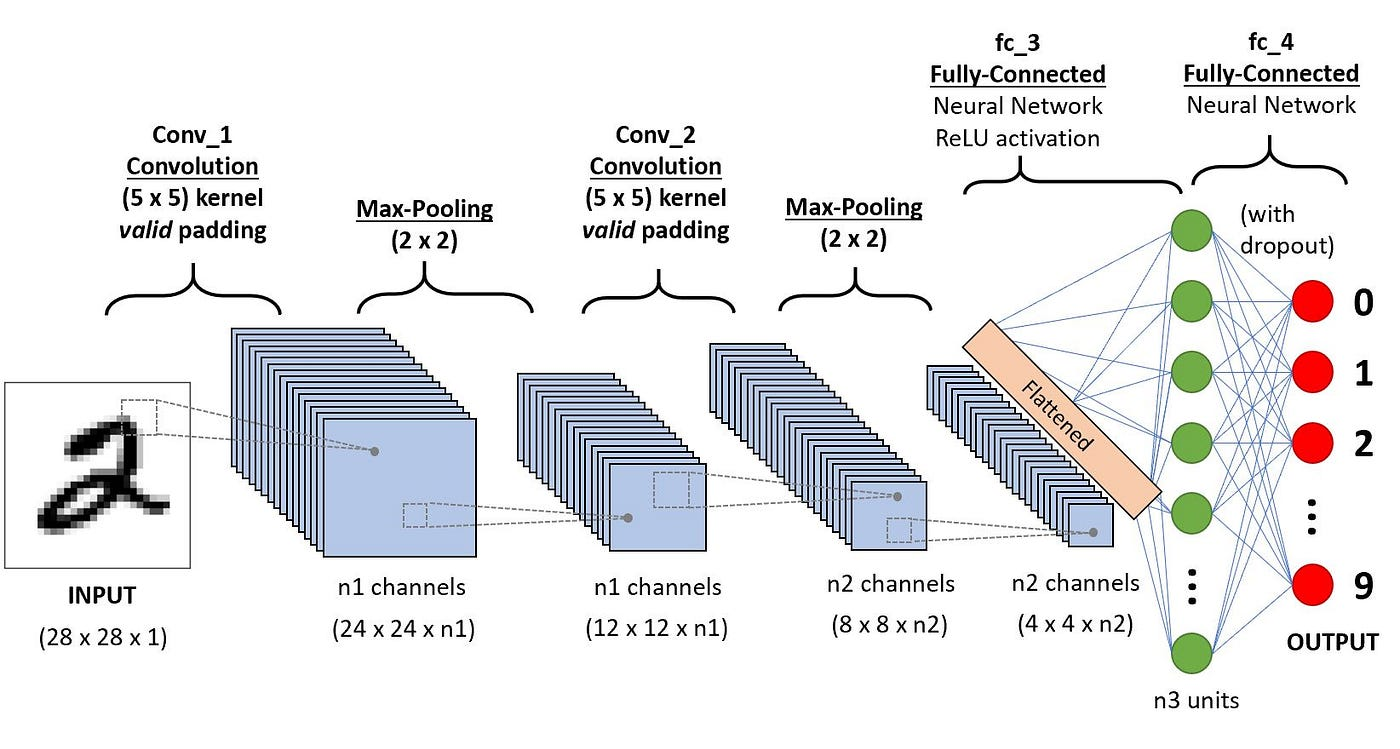

Imagine your computer is looking at a photo, trying to understand what’s in it. The convolutional layer is like a detective with a magnifying glass, scanning the image piece by piece. This detective uses tools called filters (or kernels), which are like tiny patterns or grids that help spot specific features such as edges, colors, or textures.

When a filter slides over the image, it performs a little math at each position to see how much of that feature is present. It’s like finding clues in a mystery—each filter might detect different things, like a straight line, a curve, or a color gradient. These clues help the network build a detailed understanding of the image, layer by layer.

In short, convolutional layers and filters are the dynamic duo that help computers see and understand the world in images, making sense of the visual chaos one tiny patch at a time!

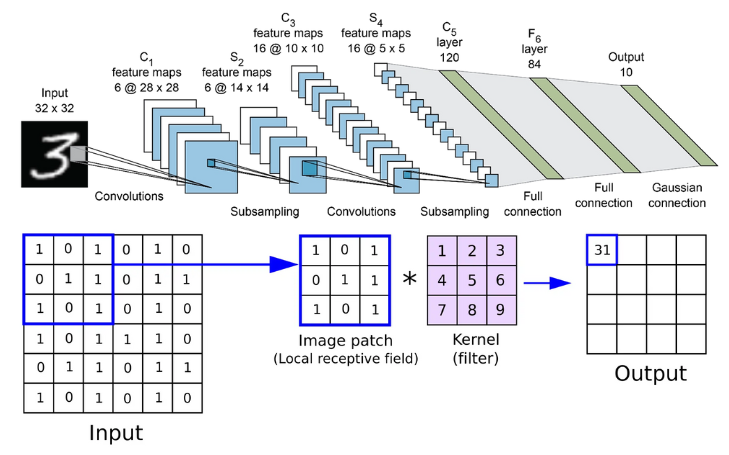

#**Why CNN not ANN for image proccessing?**

**Local Connectivity and Shared Weights:** CNNs connect neurons to small, local regions of the image and use shared weights, capturing spatial features efficiently. ANNs connect each neuron to every pixel, making them inefficient for image data.


**Parameter Efficiency:** CNNs have fewer parameters due to shared weights, leading to faster training and reduced overfitting. ANNs have a larger number of parameters, increasing computational cost and overfitting risk.


**Translation Invariance:** CNNs can recognize objects regardless of their position in the image. ANNs lack this property and require extensive training to achieve similar robustness.


**Hierarchical Feature Learning:** CNNs learn simple features first, then build up to complex patterns. ANNs struggle with this hierarchical representation.

**Computational Efficiency:** Convolution operations in CNNs are optimized for modern hardware, making them faster. ANNs have higher computational requirements and longer processing times.

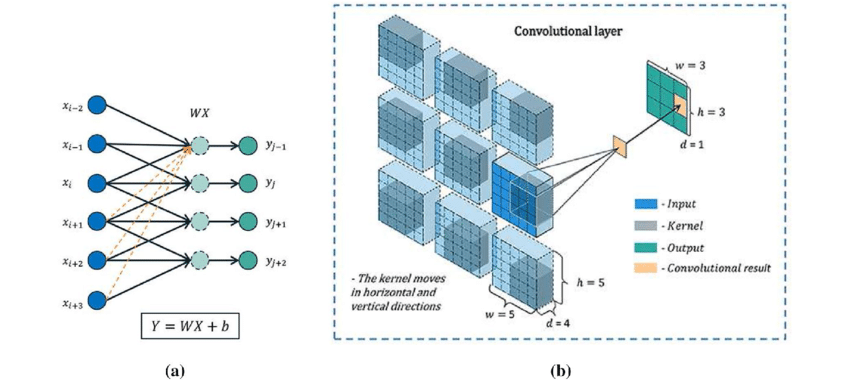



#**Pooling layers**

**Purpose:**

Downsample the input image.
Reduce spatial dimensions.

**Types:**


**Max Pooling:** Takes the maximum value from each patch.
Average Pooling: Takes the average value from each patch.
Benefits:


**Reduces Computational Load:** Decreases the size of feature maps, leading to fewer parameters and computations.

**Controls Overfitting:** Creates a more abstract representation, improving generalization.

**Provides Translation Invariance:** Makes the network robust to small shifts in the input image.









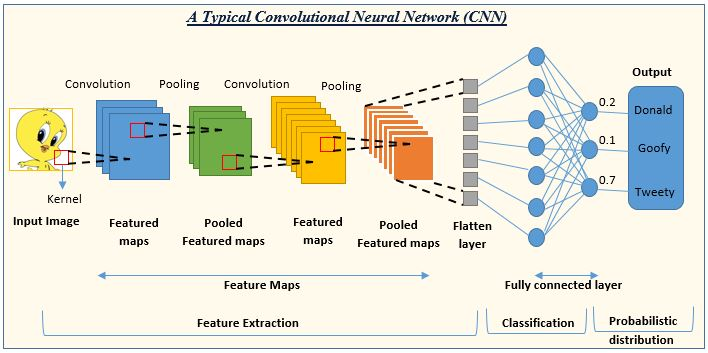


**MAX pooling**

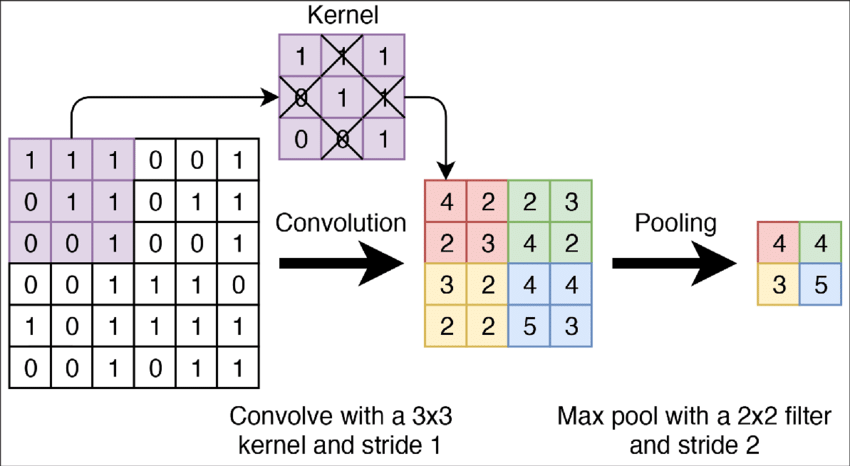

** Average Pooling**
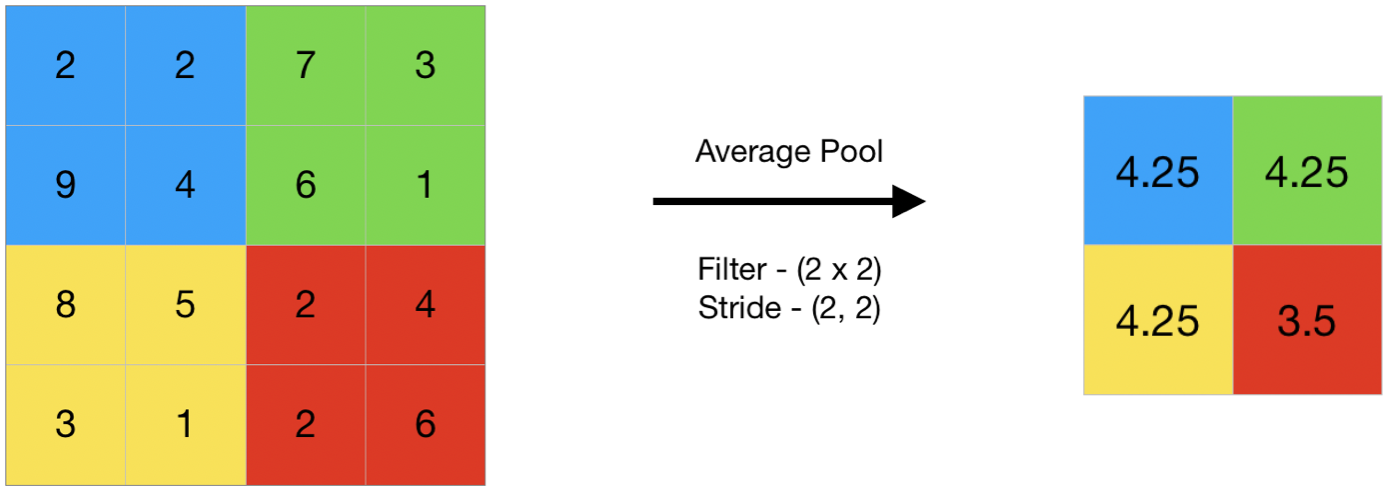



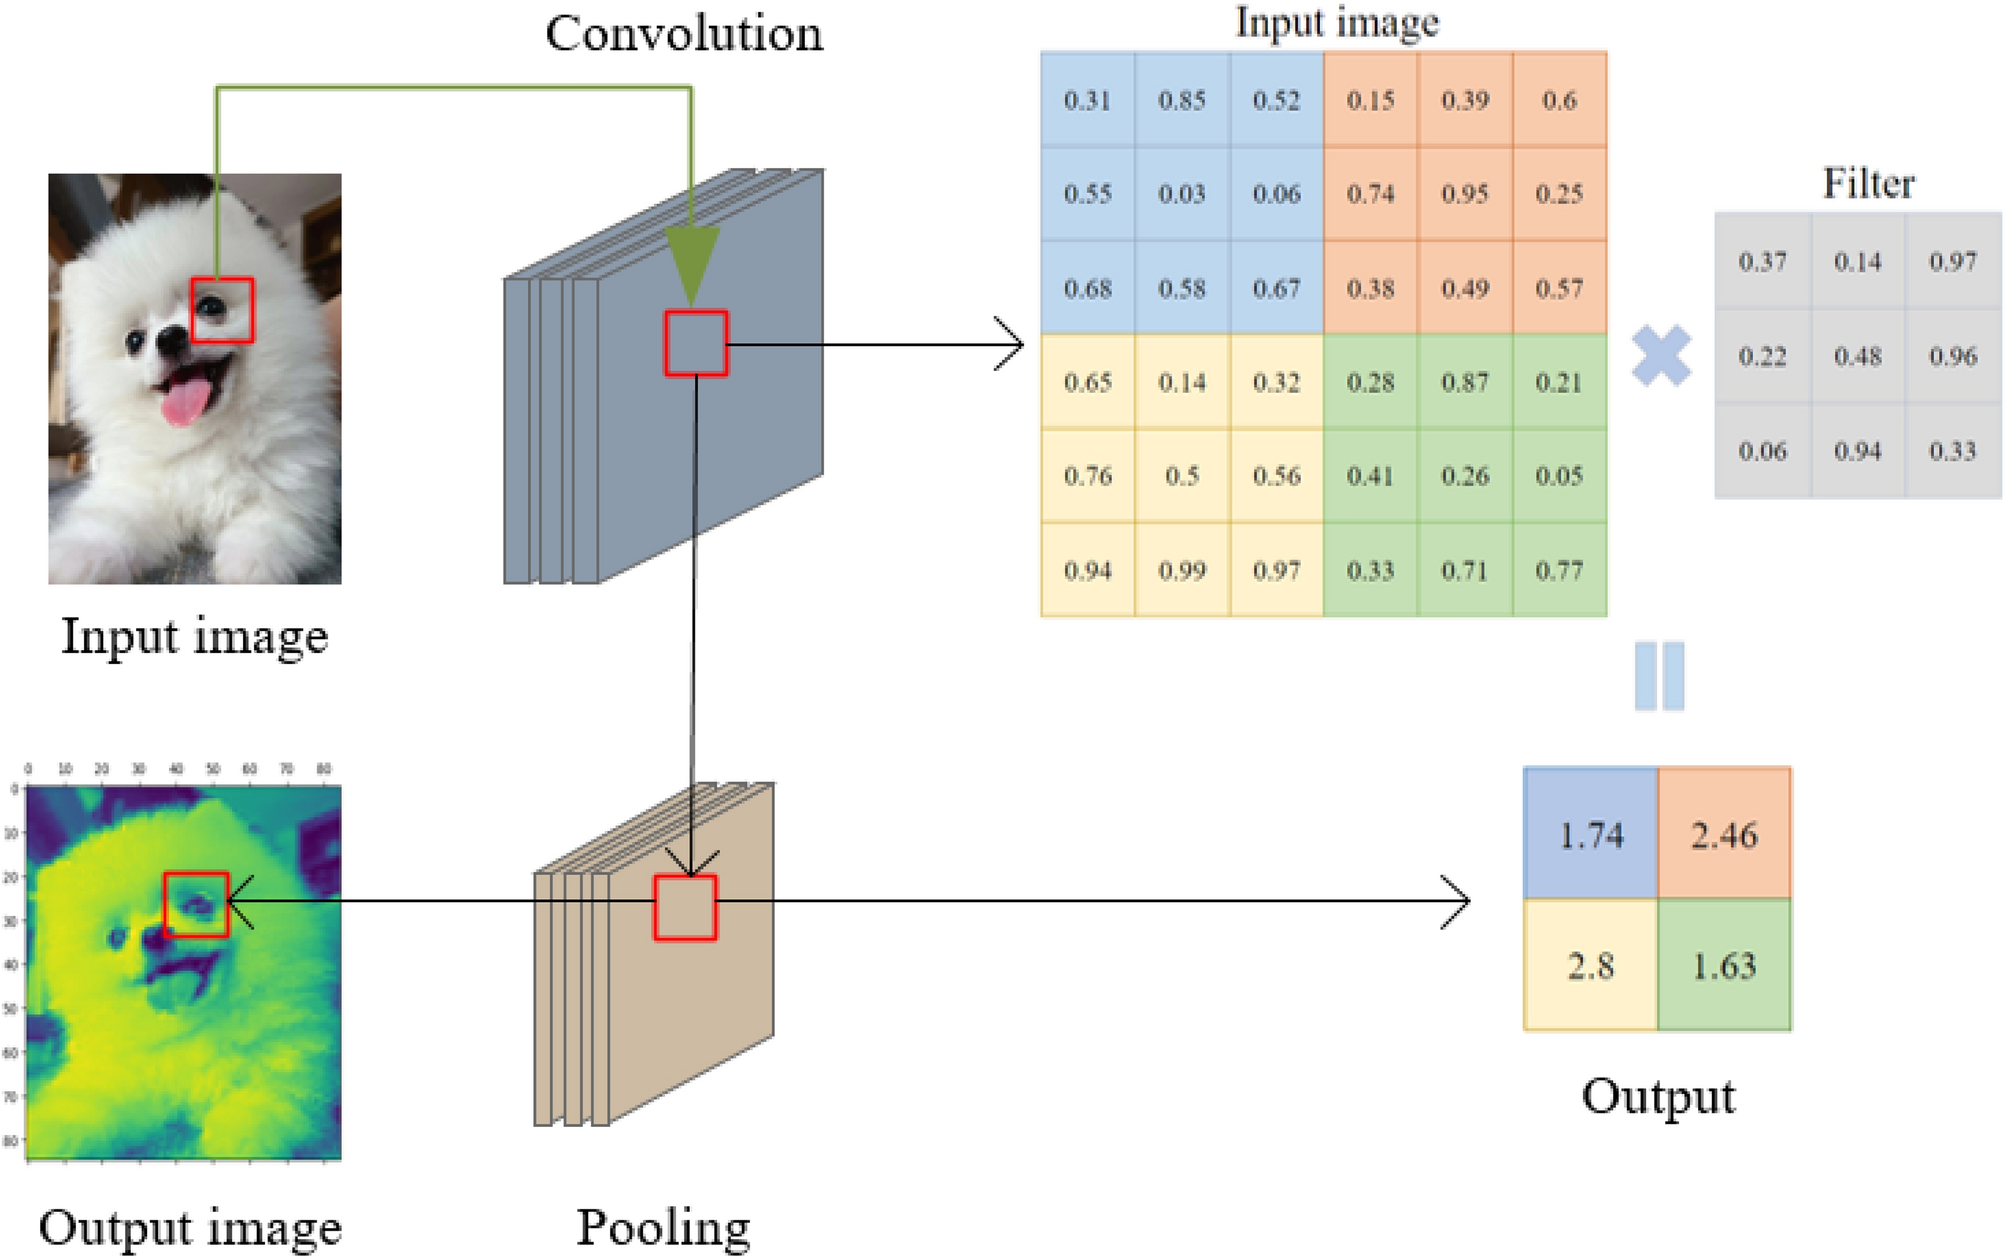

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
# import optimizer
from torch import optim
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Convert MNIST image file into Tensor of 4-Demensions ( # of images,Height,Width and Color)

my_transform = transforms.ToTensor()

#**MNIST dataset**

The MNIST database of handwritten digits.

Split	Examples
'test'	10,000
'train'	60,000

https://www.tensorflow.org/datasets/catalog/mnist

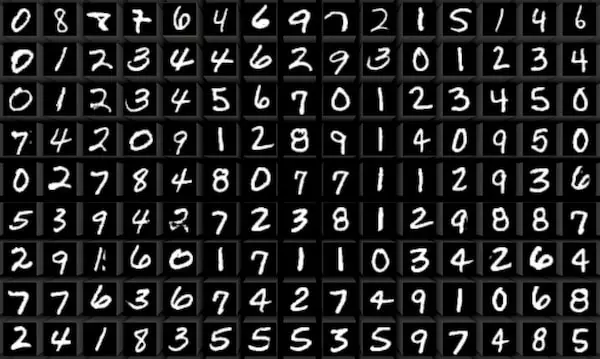

In [4]:
# Train Data

train_data = datasets.MNIST(root='../CNN_DATA', train=True, download=True, transform=my_transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 6156745.05it/s]


Extracting ../CNN_DATA/MNIST/raw/train-images-idx3-ubyte.gz to ../CNN_DATA/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1432050.19it/s]

Extracting ../CNN_DATA/MNIST/raw/train-labels-idx1-ubyte.gz to ../CNN_DATA/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2732698.46it/s]


Extracting ../CNN_DATA/MNIST/raw/t10k-images-idx3-ubyte.gz to ../CNN_DATA/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1758239.85it/s]

Extracting ../CNN_DATA/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../CNN_DATA/MNIST/raw



In [5]:
# Test data


test_data = datasets.MNIST(root='../CNN_DATA', train=False, download=True, transform=my_transform)


In [6]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../CNN_DATA
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../CNN_DATA
    Split: Test
    StandardTransform
Transform: ToTensor()

In [8]:
pwd

'/content'

In [9]:
ls

sample_data/


In [10]:
cd ..

/


In [11]:
ls


bin@       cuda-keyring_1.0-1_all.deb  home/    lib64@   NGC-DL-CONTAINER-LICENSE  run/   tmp/
boot/      datalab/                    kaggle/  libx32@  opt/                      sbin@  tools/
CNN_DATA/  dev/                        lib@     media/   proc/                     srv/   usr/
content/   etc/                        lib32@   mnt/     root/                     sys/   var/


In [12]:
cd CNN_DATA

/CNN_DATA


In [13]:
ls


MNIST/


In [14]:
cd MNIST

/CNN_DATA/MNIST


In [15]:
ls

raw/


In [16]:
cd raw

/CNN_DATA/MNIST/raw


In [17]:
ls

t10k-images-idx3-ubyte     t10k-labels-idx1-ubyte.gz   train-labels-idx1-ubyte
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte     train-labels-idx1-ubyte.gz
t10k-labels-idx1-ubyte     train-images-idx3-ubyte.gz


In [18]:
cd ../


/CNN_DATA/MNIST


In [19]:
cd ~

/root


In [20]:
cd ..

/


In [21]:
cd content

/content


In [22]:
pwd

'/content'

In [23]:
ls

sample_data/


In [24]:
# Now we create a loader , to have data in batches
# Let's create a small batch size for images ... let's say 10

train_loader = DataLoader(dataset=train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=10, shuffle=False)


In [25]:
# Let's Define the CNN model
# Describe convolutional layer nd what it's doing ( 2 convolutional layers)
# This is just an example in the next video we'll build out the actual model

conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(3,3), stride=1)
conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(3,3), stride=1)

In [26]:
# Grab one MNIST record

for i, (X_train, y_train) in enumerate(train_data):
  break

In [27]:
X_train

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [28]:
X_train.shape

torch.Size([1, 28, 28])

In [29]:
x = X_train.view(1,1,28,28)

In [30]:
x

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [31]:
# Let's perform our 1st concolution

x = F.relu(conv1(x)) # Rectified Linear Unit for our activation function


In [32]:
# 1 single image , 6 is the filters we asked  , 26x26 because we didn't turn on the padding
x.shape

torch.Size([1, 6, 26, 26])

In [33]:
# Let's do the pass thuru the Pooling layer

x = F.max_pool2d(x, kernel_size=2) # Kernel size of 2 and stride 2

In [34]:
# 13 x 13 is literly the pooling out of 26 x 26
x.shape

torch.Size([1, 6, 13, 13])

In [35]:
# let's do our second convolutional layer

x = F.relu(conv2(x))

In [36]:
# 13 x 13 to 11 x 11 we lost 2 pixel qround the image (padding is off)
x.shape

torch.Size([1, 16, 11, 11])

In [37]:
# Pooling layer

x = F.max_pool2d(x, kernel_size=2)

In [38]:
x.shape #11/2 = 5.5 we have to round down coz we cannot invent data

torch.Size([1, 16, 5, 5])

In [39]:
((28-2)/2 - 2) /2

5.5

In [40]:
# Model Class
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    # Fully Connected Layer
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2) # 2x2 kernal and stride 2
    # Second Pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2) # 2x2 kernal and stride 2

    # Re-View to flatten it out
    X = X.view(-1, 16*5*5) # negative one so that we can vary the batch size

    # Fully Connected Layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X, dim=1)


In [41]:
# Create an Instance of our model
torch.manual_seed(101)
my_cnn_model = ConvolutionalNetwork()
my_cnn_model


ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [42]:
#Loss Function Optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(my_cnn_model.parameters(), lr=0.001) #smaller the learing rate its gonna take longer to train

In [43]:
import time

start_time = time.time()

# Create variable to track things

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# For Loop of Epoch

for i in range(epochs):

  trn_corr = 0
  tst_corr = 0



  # Train

  for b, (X_train, y_train) in enumerate(train_loader):
    b += 1 # start our batches at 1
    y_pred = my_cnn_model(X_train) # get the predicted values from the training set . Not Flattened
    loss = criterion(y_pred, y_train) # to check how off are we

    predicted = torch.max(y_pred.data, 1)[1] # add up the number of predictions. Indexed off the first point
    batch_corr = (predicted == y_train).sum() # We wanna know how many we got correct. True = 1 , False = 0
    trn_corr += batch_corr # keep track as we go along in training

    # Update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



    # print out the results
    if b % 600 == 0:
      print(f'Epoch: {i} Batch: {b} Loss: {loss.item()} Accuracy: {trn_corr}')

  train_losses.append(loss)
  train_correct.append(trn_corr)



  # Test
  with torch.no_grad(): #No gradiant so we don't update our weight and biases with test data
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = my_cnn_model(X_test)
      predicted = torch.max(y_val.data, 1)[1]
      tst_corr += (predicted == y_test).sum() # T = 1 , F = 0

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)




current_time = time.time()
total_time = current_time - start_time
total_min = int(total_time / 60)
total_sec = int(total_time - (total_min * 60))
print(f'Training took: {total_min} minutes and {total_sec} seconds')


Epoch: 0 Batch: 600 Loss: 0.27714279294013977 Accuracy: 4475
Epoch: 0 Batch: 1200 Loss: 0.05869954079389572 Accuracy: 10043
Epoch: 0 Batch: 1800 Loss: 0.14001299440860748 Accuracy: 15741
Epoch: 0 Batch: 2400 Loss: 0.14789725840091705 Accuracy: 21516
Epoch: 0 Batch: 3000 Loss: 0.015575326979160309 Accuracy: 27307
Epoch: 0 Batch: 3600 Loss: 0.011459420435130596 Accuracy: 33076
Epoch: 0 Batch: 4200 Loss: 0.009168890304863453 Accuracy: 38869
Epoch: 0 Batch: 4800 Loss: 0.00417522294446826 Accuracy: 44697
Epoch: 0 Batch: 5400 Loss: 0.002396020805463195 Accuracy: 50535
Epoch: 0 Batch: 6000 Loss: 0.003313155844807625 Accuracy: 56405
Epoch: 1 Batch: 600 Loss: 0.02910645864903927 Accuracy: 5853
Epoch: 1 Batch: 1200 Loss: 0.09715400636196136 Accuracy: 11732
Epoch: 1 Batch: 1800 Loss: 0.0060613942332565784 Accuracy: 17610
Epoch: 1 Batch: 2400 Loss: 0.022610651329159737 Accuracy: 23501
Epoch: 1 Batch: 3000 Loss: 0.04838515818119049 Accuracy: 29385
Epoch: 1 Batch: 3600 Loss: 0.005749894306063652 Acc

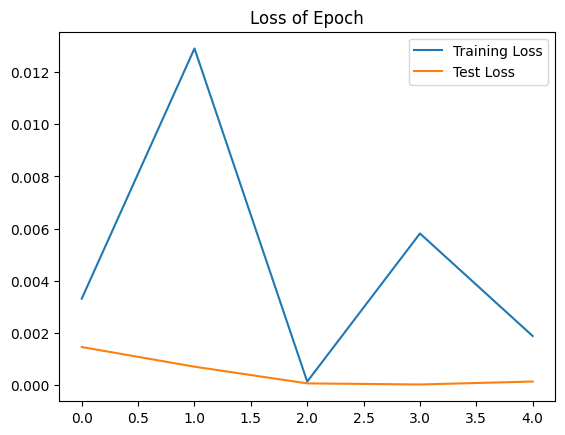

In [44]:
train_losses = [i.item() for i in train_losses]
test_losses = [i.item() for i in test_losses]
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss of Epoch')
plt.legend()

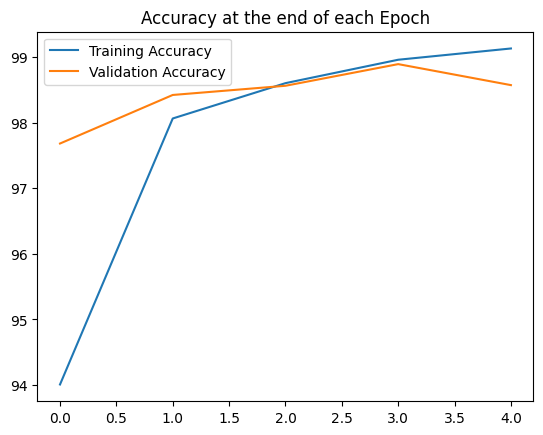

In [45]:
# Graph the accuracy
# graph the accuracy at the end of each epoch
plt.plot([t/600 for t in train_correct], label="Training Accuracy")
plt.plot([t/100 for t in test_correct], label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch")
plt.legend()